#Artificial Neural Network Classification

Classification of Parkinson's Disease using Artificial Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
def load_data(file_path):
    return pd.read_csv('classification_dataset.data')

In [ ]:
def preprocess_data(data):
    # Assuming the last column is the target variable
    X = data.iloc[:, 1:-1].values
    y = data.iloc[:, -1].values

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

In [ ]:
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def train_and_evaluate_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = create_model(X.shape[1])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Make predictions on the test set
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return model, history

Epoch 1/100
4/4 [==============================] - 2s 122ms/step - loss: 0.7597 - accuracy: 0.3871 - val_loss: 0.7935 - val_accuracy: 0.4375
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.7161 - accuracy: 0.4839 - val_loss: 0.6976 - val_accuracy: 0.5625
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6711 - accuracy: 0.6371 - val_loss: 0.6318 - val_accuracy: 0.7812
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 0.6347 - accuracy: 0.7661 - val_loss: 0.5846 - val_accuracy: 0.7812
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6029 - accuracy: 0.8065 - val_loss: 0.5465 - val_accuracy: 0.7812
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.5653 - accuracy: 0.8306 - val_loss: 0.5134 - val_accuracy: 0.7812
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5351 - accuracy: 0.8145 - val_loss: 0.4861 - val_accuracy: 0.7812
Epoch 8/100
4/4 [==

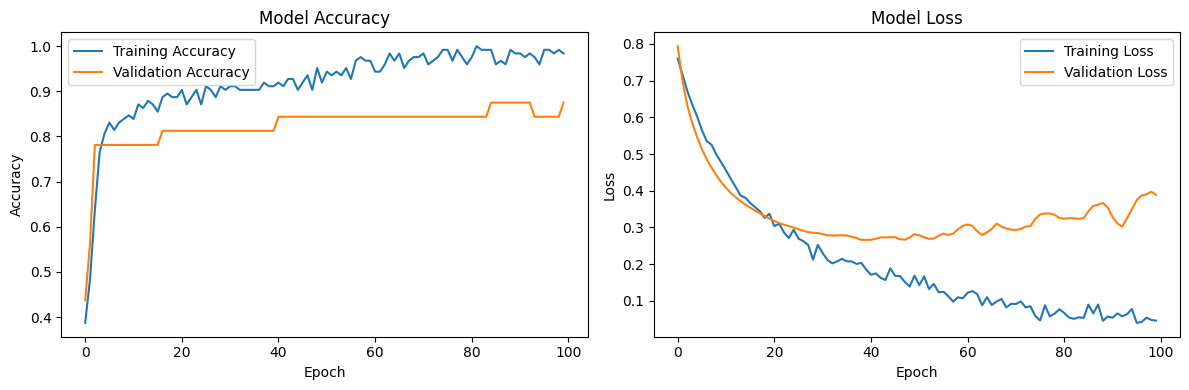

In [ ]:
def main():
    # Load the data
    data = load_data('classification_dataset.csv')

    # Preprocess the data
    X, y = preprocess_data(data)

    # Train and evaluate the model
    model, history = train_and_evaluate_model(X, y)

    # Optional: Plot training history
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#Artificial Neural Network Progression Prediction

37/37 [==============================] - 0s 1ms/step
Mean Squared Error:
Motor_UPDRS: 14.3445
Total_UPDRS: 22.0249

R-squared Score:
Motor_UPDRS: 0.7753
Total_UPDRS: 0.8012


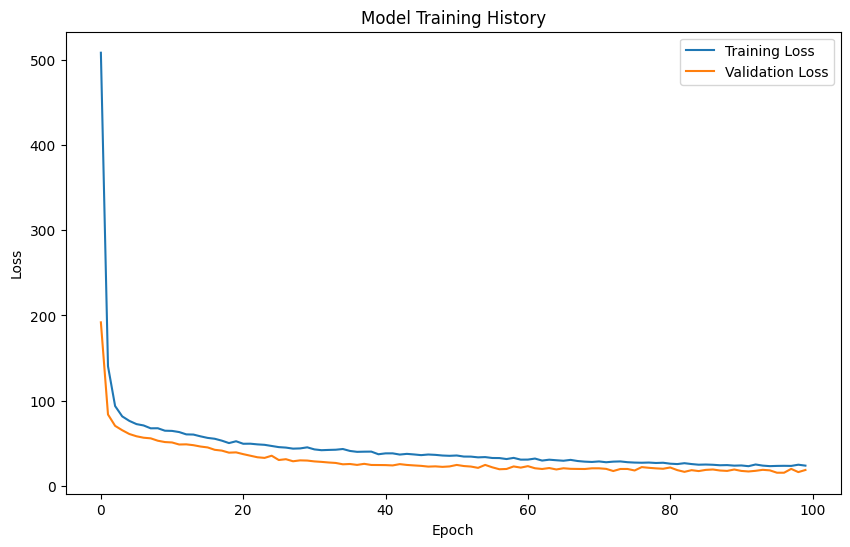

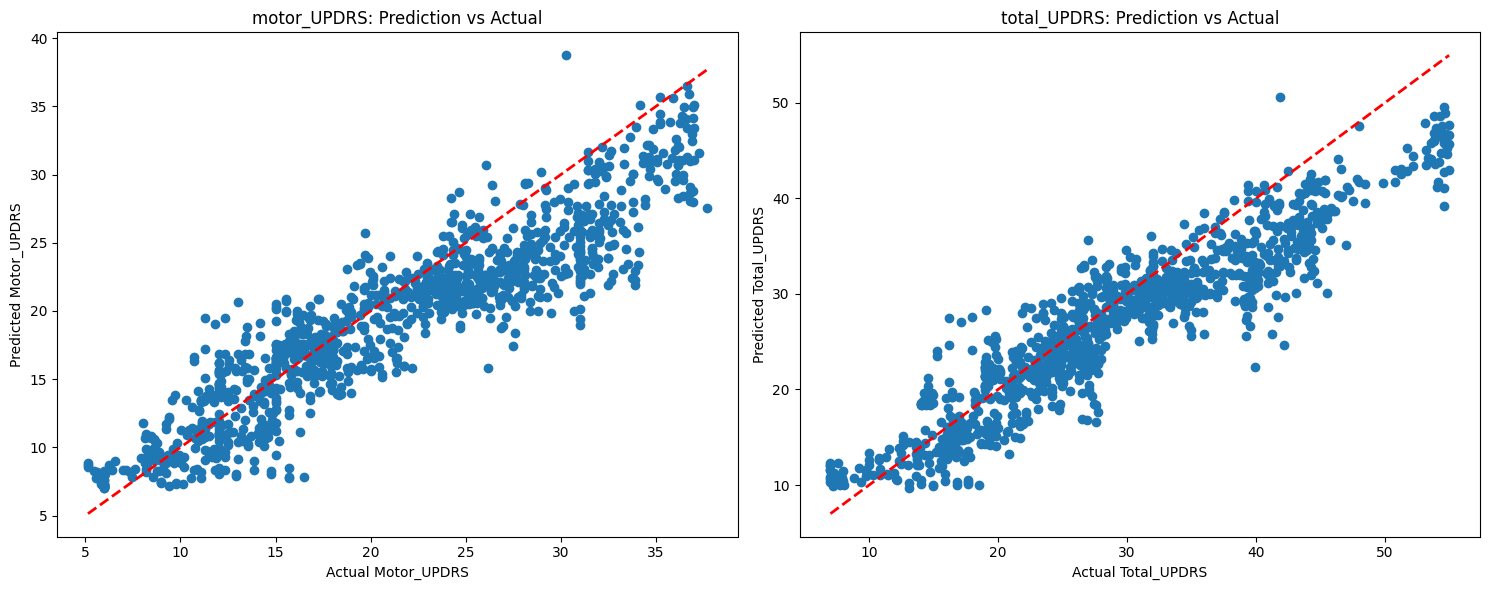

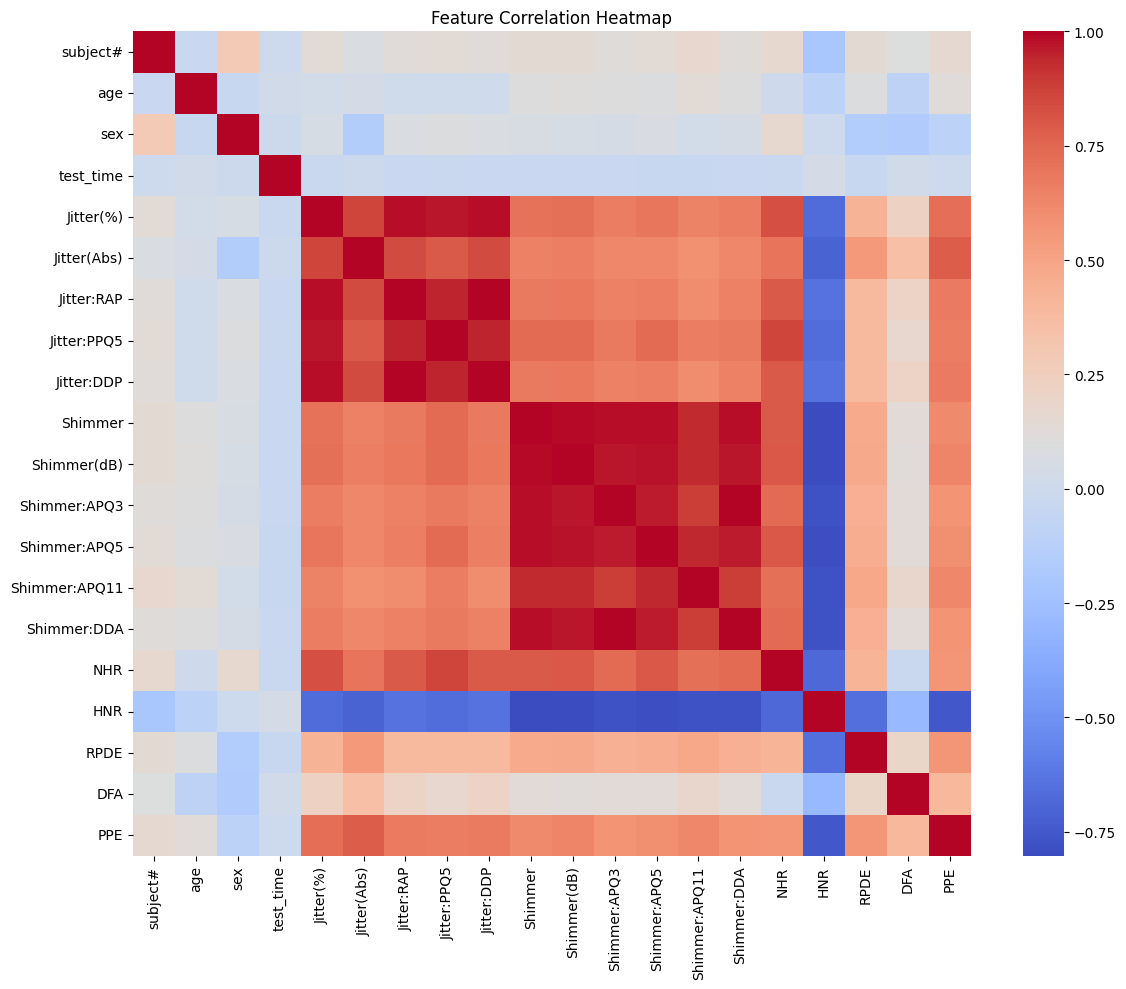

1/1 [==============================] - 0s 36ms/step

Prediction for a single sample:
Predicted Motor_UPDRS: 26.5298
Predicted Total_UPDRS: 37.3606


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Progression_Dataset.csv')

# Define features and target variables
target_vars = ['motor_UPDRS', 'total_UPDRS']
feature_vars = [col for col in data.columns if col not in target_vars and col != 'Subject']

X = data[feature_vars]
y = data[target_vars]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(2)  # Output layer with 2 neurons for Motor_UPDRS and Total_UPDRS
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Mean Squared Error:")
print(f"Motor_UPDRS: {mse[0]:.4f}")
print(f"Total_UPDRS: {mse[1]:.4f}")
print("\nR-squared Score:")
print(f"Motor_UPDRS: {r2[0]:.4f}")
print(f"Total_UPDRS: {r2[1]:.4f}")

# Visualizations

# Training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction vs Actual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_test['motor_UPDRS'], y_pred[:, 0])
ax1.plot([y_test['motor_UPDRS'].min(), y_test['motor_UPDRS'].max()],
         [y_test['motor_UPDRS'].min(), y_test['motor_UPDRS'].max()],
         'r--', lw=2)
ax1.set_xlabel('Actual Motor_UPDRS')
ax1.set_ylabel('Predicted Motor_UPDRS')
ax1.set_title('motor_UPDRS: Prediction vs Actual')

ax2.scatter(y_test['total_UPDRS'], y_pred[:, 1])
ax2.plot([y_test['total_UPDRS'].min(), y_test['total_UPDRS'].max()],
         [y_test['total_UPDRS'].min(), y_test['total_UPDRS'].max()],
         'r--', lw=2)
ax2.set_xlabel('Actual Total_UPDRS')
ax2.set_ylabel('Predicted Total_UPDRS')
ax2.set_title('total_UPDRS: Prediction vs Actual')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Predict on a single sample (example)
sample = X_test_scaled[0].reshape(1, -1)
prediction = model.predict(sample)
print("\nPrediction for a single sample:")
print(f"Predicted Motor_UPDRS: {prediction[0][0]:.4f}")
print(f"Predicted Total_UPDRS: {prediction[0][1]:.4f}")